In [12]:
# Import required libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# Set seed for reproducibility
torch.manual_seed(0)

# Generate a linearly separable dataset
X, y = make_blobs(
    n_samples=1000, n_features=2, centers=2, cluster_std=3, random_state=23
)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23
)

In [14]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [16]:
# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def heaviside_step_fn(self, z):
        return (z >= 0).float()  # Binary output: 0 or 1

    def forward(self, x):
        z = self.linear(x)
        return self.heaviside_step_fn(z)

In [17]:
# Initialize model
perceptron = Perceptron(input_dim=2)

# Hyperparameters
learning_rate = 0.01
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    total_loss = 0.0

    for input_vec, label in zip(X_train, y_train):
        input_vec = input_vec.view(1, -1)  # shape: [1, 2]
        label = label.view(1, -1)  # shape: [1, 1]

        # Forward pass
        pred = perceptron(input_vec)
        error = label - pred

        total_loss += error.abs().item()

        # Manual update (Perceptron rule)
        with torch.no_grad():
            perceptron.linear.weight += learning_rate * error * input_vec
            perceptron.linear.bias += learning_rate * error.squeeze()  # shape fix here

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

Epoch [1/10], Loss: 71.0000
Epoch [2/10], Loss: 5.0000
Epoch [3/10], Loss: 6.0000
Epoch [4/10], Loss: 8.0000
Epoch [5/10], Loss: 6.0000
Epoch [6/10], Loss: 6.0000
Epoch [7/10], Loss: 6.0000
Epoch [8/10], Loss: 6.0000
Epoch [9/10], Loss: 7.0000
Epoch [10/10], Loss: 6.0000


In [18]:
# Testing
with torch.no_grad():
    test_preds = perceptron(X_test)
    accuracy = (test_preds == y_test).float().mean()

print(f"\nAccuracy on Test Set: {accuracy.item() * 100:.2f}%")


Accuracy on Test Set: 99.00%


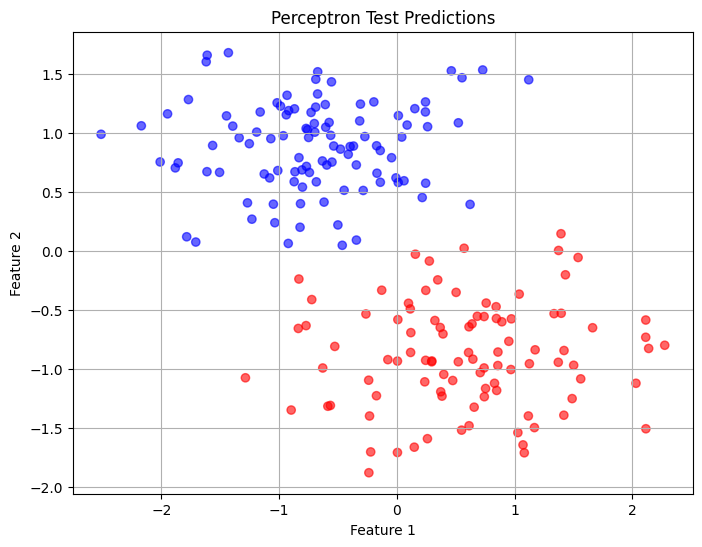

In [19]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=test_preds.view(-1).numpy(),
    cmap="bwr",
    alpha=0.6,
)
plt.title("Perceptron Test Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()